In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import patsy
import matplotlib.pyplot as plt


# 소수점 설정
pd.options.display.float_format = "{:,.3f}".format

In [6]:
df_income = pd.read_excel(r'data\KOSIS_houshold_panel_survey\data_income_kor.xlsx')
df_income

,Unnamed: 0,date,id,household,female,age,income,edu_year,ln_income
0,0,2023-03-01,1,True,False,43,5170000,12,15.458
1,1,2023-03-01,2,True,False,66,2176800,9,14.593
2,2,2023-03-01,4,True,True,50,2078090,12,14.547
3,3,2023-03-01,5,True,False,30,700514,14,13.460
4,4,2023-03-01,6,True,True,65,895976,12,13.706
...,...,...,...,...,...,...,...,...,...
22052,22052,2023-12-01,7109,False,True,39,2500000,16,14.732
22053,22053,2023-12-01,7114,False,True,51,2292890,12,14.645
22054,22054,2023-12-01,7118,False,True,39,135000,16,11.813
22055,22055,2023-12-01,7124,False,True,77,270000,6,12.506


In [7]:
y,X = patsy.dmatrices('ln_income ~ edu_year',data=df_income, return_type='dataframe')

result = sm.OLS(y,X).fit(cov_type='HC0')
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ln_income   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     7854.
Date:                Sat, 09 Mar 2024   Prob (F-statistic):               0.00
Time:                        13:57:35   Log-Likelihood:                -28789.
No. Observations:               22057   AIC:                         5.758e+04
Df Residuals:                   22055   BIC:                         5.760e+04
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.5089      0.025    495.433      0.000      12.459      12.558
edu_year       0.1591      0.002     88.623      0.000       0.156       0.163
==============================================================================
Omnibus:                     6968.947   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29732.713
Skew:                          -1.505   Prob(JB):                         0.00
Kurtosis:                       7.826   Cond. No.                         51.1
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

<Axes: xlabel='edu_year'>

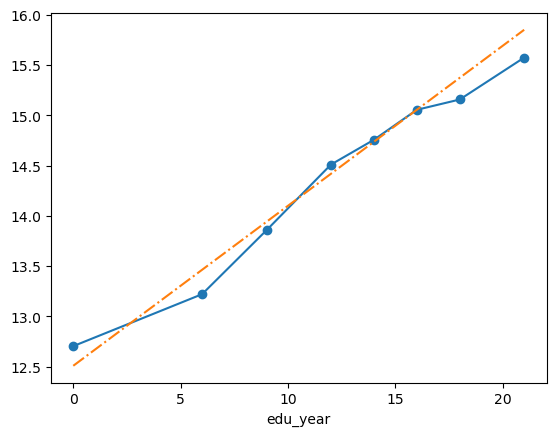

In [8]:
school_means = df_income.groupby('edu_year')['ln_income'].mean()
yhat = pd.Series(result.params['Intercept'] + result.params['edu_year'] * school_means.index.values, index=school_means.index.values)


plt.figure()
school_means.plot(kind='line', x='edu_year', y='ln_income', style='-o')
yhat.plot(style='-.')